# Gráfico de pilha (*Stack Plot*)

O gráfico de pilha exibe os dados em pilhas e mostra a distribuição dos dados ao longo do tempo.

Quando usar: É usado para verificar múltiplas plotagens de área variável em um único gráfico, como para compreender a mudança de distribuição em múltiplas variáveis em um intervalo.

### Importando bibliotecas e dados

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np_data= pd.read_csv('datasets/national_parks.csv')

In [2]:
np_data.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800


In [3]:
x = np_data['Year']

O gráfico permite a visualização dos dados sobre o tempo.

Como o gráfico de pilha requer empilhamento, isso é feito usando ```np.vstack()```.

In [5]:
y = np.vstack([np_data['Badlands'], 
               np_data['GrandCanyon'], 
               np_data['BryceCanyon']])

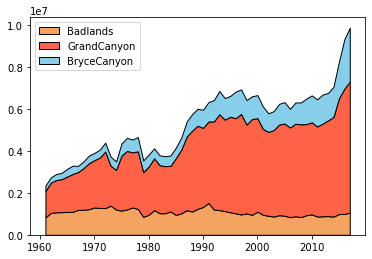

In [6]:
# Rótulos para cada pilha
labels = ['Badlands', 
          'GrandCanyon', 
          'BryceCanyon']

# Cores para cada pilha
colors = ['sandybrown', 
          'tomato', 
          'skyblue']

#  Similar a pandas df.plot.area()
plt.stackplot(x, y, 
              labels=labels,
              colors=colors, 
              edgecolor='black')

# Plota legenda no campo superior esquerdo da figura
plt.legend(loc=2)

plt.show()

```plt.stackplot``` recebe dados numéricos do primeiro argumento (ano) e do segundo argumento (Nationalparks), empilhados verticalmente.

### Gráfico de porcentagem empilhada

Semelhante ao gráfico de pilha, mas cada dado é convertido em uma porcentagem da distribuição que mantém, ou seja, gráficos de pilha com base na porcentagem na distribuição.



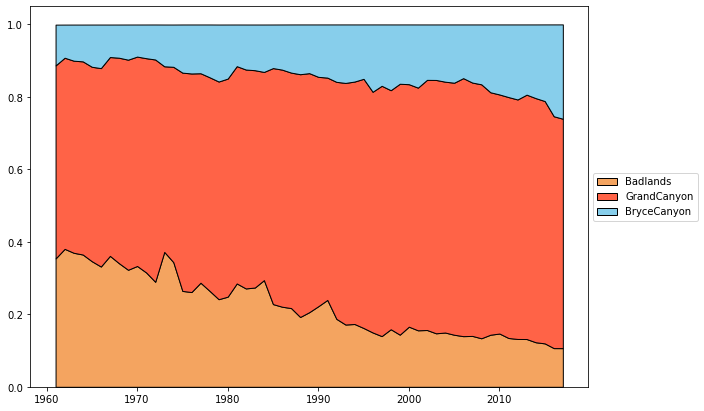

In [7]:
plt.figure(figsize=(10,7))

data_perc = np_data.divide(np_data.sum(axis=1), axis=0)

plt.stackplot(x,
              data_perc["Badlands"],data_perc["GrandCanyon"],data_perc["BryceCanyon"],
              edgecolor='black',
              colors=colors,
              labels=labels)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

```data_prec``` é usado para dividir a porcentagem geral em distribuições de porcentagem individuais. 

```s = np_data.sum(axis=1)``` calcula a soma ao longo das colunas, ```np_data.divide(s,axis=0)``` divide os dados ao longo das linhas.

### Stem Plots

O *Stem plot* aceita valores negativos, então a diferença é tirada dos dados e é plotada ao longo do tempo.

Quando usar: semelhante a um gráfico de pilha, mas a diferença ajuda na comparação dos pontos de dados, permitindo ver os números negativos, ou seja, a diferença nos dados ao longo do tempo.

In [8]:
np_stem= np_data.copy()

In [9]:
np_stem[['Badlands', 
         'GrandCanyon',
         'BryceCanyon']] = np_data[['Badlands', 
                                    'GrandCanyon',
                                    'BryceCanyon']].diff()

np_stem.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,NaN,NaN,NaN
1,1962,211500.0,194400.0,-13800.0
2,1963,29200.0,92100.0,38500.0
3,1964,5800.0,37100.0,10800.0
4,1965,11500.0,112600.0,66500.0


```diff()``` é usado para encontrar a diferença entre os dados anteriores e é armazenado em outra cópia dos dados. O primeiro ponto de dados é NaN ("não é um número"), pois não contém nenhum dado anterior para calcular a diferença.

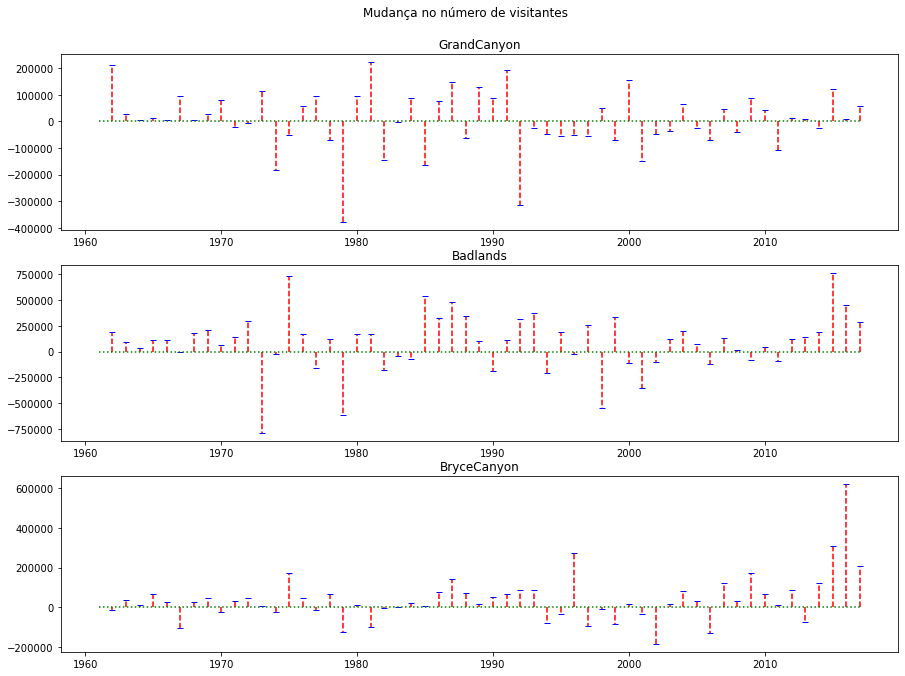

In [10]:
plt.figure(figsize=(15,11))

plt.suptitle('Mudança no número de visitantes', y=0.94)

plt.subplot(311)
plt.stem(np_stem['Year'],
         np_stem['Badlands'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('GrandCanyon')

plt.subplot(312)
plt.stem(np_stem['Year'],
         np_stem['GrandCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('Badlands')

plt.subplot(313)
plt.stem(np_stem['Year'],
         np_stem['BryceCanyon'],
         markerfmt = 'b_',
         linefmt = 'r--',
         basefmt = 'g:')
plt.title('BryceCanyon')

plt.show()

Os subplots são criados para acomodar subplots de 3 linhas e 1 coluna na figura. 

```plt.stem()``` considera o primeiro argumento como dados numéricos, ou seja, o ano e o segundo argumento como dados numéricos dos visitantes do Parque Nacional.

Fonte: Traduzido de [Data-visualization-using-matplotlib](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)